# 数据探索
1.探索月份、季节延误比例分布
2.探索航空公司、飞机、机场的延误比例分布
3.探索空气相关：风力、AQI延误比例分布

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']

import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# 天气数据

All_Data = pd.read_table('/Users/tuyu/000000毕业设计/Flight_Delay/All_Data2016.csv', sep=',',encoding='gb2312',low_memory=False)
All_Data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划起飞时间1,...,出发机场风力,出发机场风向,到达机场天气,到达机场最低气温,到达机场最高气温,到达机场aqi,到达机场aqiInfo,到达机场aqiLevel,到达机场风力,到达机场风向
0,SWA,TAO,CZ3855,1451606400,1451619600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,无持续风向,多云,4.0,7.0,115.0,轻度污染,3.0,4-5级,西南风
1,NNG,CAN,CZ3295,1451606400,1451610600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,东风,晴转多云,12.0,21.0,98.0,良,2.0,微风,无持续风向
2,SWA,NGB,CZ3855,1451606400,1451610900,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,无持续风向,晴转多云,7.0,13.0,70.0,良,2.0,微风,东南风
3,CSX,TNA,CZ3983,1451606400,1451613600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,南风,晴,4.0,10.0,146.0,轻度污染,3.0,3-4级,南风
4,XIY,SZX,HU7871,1451606700,1451616600,NaN,NaN,0.0,取消,2016-01-01 00:05:00+00:00,...,微风,东北风,多云,16.0,22.0,94.0,良,2.0,微风,无持续风向


# 数据探索
月份延误占比，季节延误分布
每个航班，每个机场，每个航空公司和飞机延误的相关性

In [3]:
sum(All_Data['航班编号'] == '0')

0

In [4]:
sum(All_Data['飞机编号'] == 0.0)

119638

In [5]:
len(All_Data['飞机编号'])

5277473

In [6]:
sum((All_Data['航班是否取消'] == '取消') & (All_Data['出发特情'] == 1))

12397

In [7]:
sum((All_Data['航班是否取消'] == '取消') & (All_Data['出发特情'] == 0))

185847

In [8]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5277473 entries, 0 to 5277472
Data columns (total 57 columns):
出发机场            object
到达机场            object
航班编号            object
计划起飞时间          int64
计划到达时间          int64
实际起飞时间          float64
实际到达时间          float64
飞机编号            float64
航班是否取消          object
计划起飞时间1         object
计划到达时间1         object
计划飞行时间          float64
实际起飞时间1         object
实际到达时间1         object
实际飞行时间          float64
起飞延误时间          float64
到达延误时间          float64
计划起飞日期          object
计划起飞时刻          int64
航班月份            int64
计划到达日期          object
计划到达时刻          int64
航空公司            object
航班季节            object
是否为去程航班         int64
是否是补班航班         int64
是否为国内航班         int64
前序延误            float64
起飞间隔            float64
平均延误时间          float64
延误时间标准差         float64
最大延误时间          float64
延误时间中位数         float64
开始时间            object
结束时间            object
到达特情            int64
特情机场            object
开始日期            object
开始时刻     

In [11]:
print(sum(All_Data['到达机场风力'] == 'NaN'))

0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [3]:
#构建标签
All_Data['是否延误3小时以上'] = All_Data['起飞延误时间'].apply(lambda x : 0 if x < 3 else 1)

In [17]:
#探索每个月份的延误比
月份延误分布 = All_Data.groupby('航班月份', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
月份延误分布['月份延误比'] = 月份延误分布['延误'] / 月份延误分布['总数'] 
月份延误分布['占总延误比'] = 月份延误分布['延误'] / sum(All_Data.是否延误3小时以上) 
月份延误分布

,航班月份,延误,总数,月份延误比,占总延误比
0,1,51001,627043,0.081336,0.148104
1,2,32422,594441,0.054542,0.094152
2,3,33537,617387,0.054321,0.097390
3,4,37941,617906,0.061403,0.110179
4,5,42225,633437,0.066660,0.122619
5,6,32905,288256,0.114152,0.095554
6,7,25703,321376,0.079978,0.074640
7,8,17544,325906,0.053831,0.050947
8,9,15311,311281,0.049187,0.044462
9,10,13723,322655,0.042531,0.039851


/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


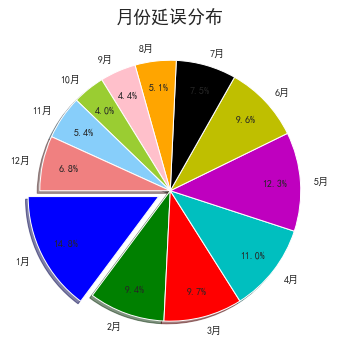

In [48]:
plt.figure(1, figsize=(6,6))
labels=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
#绘图显示的标签    
values = 月份延误分布.ix[:,-1].tolist()
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','pink','yellowgreen','lightskyblue','lightcoral']
explode=[0.1,0,0,0,0,0,0,0,0,0,0,0]
#旋转角度
plt.title("月份延误分布",fontsize=18)
#标题
plt.pie(values,labels=labels,explode=explode,colors=colors,
            startangle = 180,pctdistance=0.8,
            shadow=True,autopct='%1.1f%%')
plt.show()

In [27]:
sum(All_Data.是否延误3小时以上)

344359

In [38]:
#探索每个季节的延误分布
季节延误分布 = All_Data.groupby('航班季节')['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
季节延误分布['季节延误占比'] = 季节延误分布['延误'] / 季节延误分布['总数'] 
季节延误分布['占总延误比'] = 季节延误分布['延误'] / sum(All_Data.是否延误3小时以上) 
季节延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,延误,总数,季节延误占比,占总延误比
航班季节,,,,
冬,106816,1535710,0.069555,0.310188
夏,76152,935538,0.081399,0.221141
春,113703,1868730,0.060845,0.330187
秋,47688,937495,0.050867,0.138483


/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


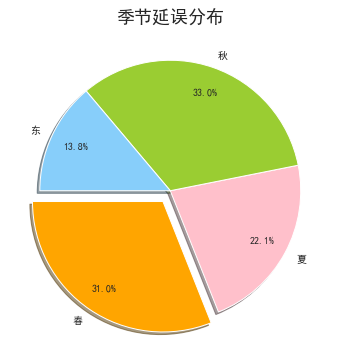

In [40]:
plt.figure(1, figsize=(6,6))
labels=['春','夏','秋','东']
#绘图显示的标签    
values = 季节延误分布.ix[:,-1].tolist()
colors=['orange','pink','yellowgreen','lightskyblue']
explode=[0.1,0,0,0]
#旋转角度
plt.title("季节延误分布",fontsize=18)
#标题
plt.pie(values,labels=labels,explode=explode,colors=colors,
            startangle = 180,pctdistance=0.8,
            shadow=True,autopct='%1.1f%%')
plt.show()

In [4]:
#探索航空公司的延误比
航空公司延误分布 = All_Data.groupby('航空公司', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
航空公司延误分布['航空公司延误比'] = 航空公司延误分布['延误'] / 航空公司延误分布['总数'] 
航空公司延误分布['占总延误比'] = 航空公司延误分布['延误'] / sum(All_Data.是否延误3小时以上) 
航空公司延误分布

,航空公司,延误,总数,航空公司延误比,占总延误比
0,3K,0,4,0.000000,0.000000
1,3U,12240,242739,0.050425,0.035544
2,4U,1,1,1.000000,0.000003
3,5J,0,3,0.000000,0.000000
4,6E,0,1,0.000000,0.000000
...,...,...,...,...,...
154,Z2,0,1,0.000000,0.000000
155,ZA,1,1,1.000000,0.000003
156,ZE,0,2,0.000000,0.000000
157,ZH,16837,312704,0.053843,0.048894


In [5]:
航空公司延误分布 = 航空公司延误分布.ix[航空公司延误分布['占总延误比'] > 0]
航空公司延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,航空公司,延误,总数,航空公司延误比,占总延误比
1,3U,12240,242739,0.050425,0.035544
2,4U,1,1,1.000000,0.000003
6,8L,7280,96936,0.075101,0.021141
7,9C,8064,101075,0.079782,0.023417
8,9H,452,8303,0.054438,0.001313
...,...,...,...,...,...
150,WS,2,4,0.500000,0.000006
152,Y8,554,8924,0.062080,0.001609
153,YG,1,1,1.000000,0.000003
155,ZA,1,1,1.000000,0.000003


In [6]:
航空公司延误分布 = 航空公司延误分布.ix[航空公司延误分布['延误'] > 10]
航空公司延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,航空公司,延误,总数,航空公司延误比,占总延误比
1,3U,12240,242739,0.050425,0.035544
6,8L,7280,96936,0.075101,0.021141
7,9C,8064,101075,0.079782,0.023417
8,9H,452,8303,0.054438,0.001313
10,A6,303,3353,0.090367,0.000880
18,AQ,1318,20544,0.064155,0.003827
26,BK,4001,53011,0.075475,0.011619
29,CA,25964,526964,0.049271,0.075398
32,CN,311,7029,0.044245,0.000903
34,CZ,61474,891943,0.068921,0.178517


In [50]:
len(航空公司延误分布['延误'])

41

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


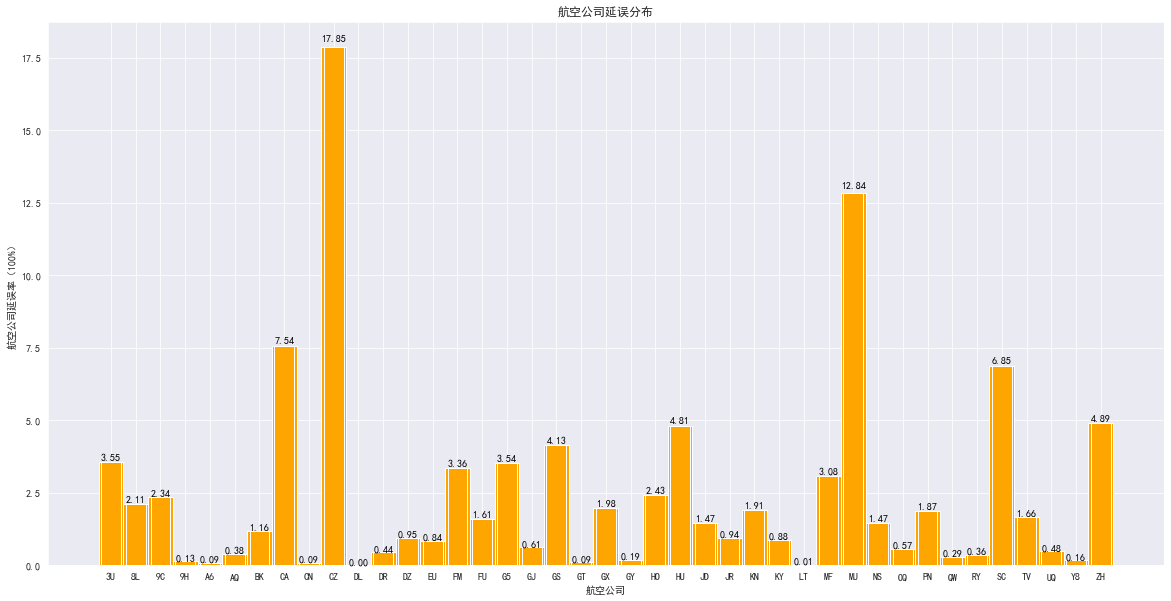

In [39]:
plt.figure(figsize=(20,10))
values = 航空公司延误分布.ix[:,-1].tolist()
values = [item * 100 for item in values]


labels = 航空公司延误分布['航空公司'].values.tolist()
# index = np.arange(len(values))
# 设置柱形图宽度
# bar_width = 0.2
# rects1=plt.barh(index+bar_width,values, tick_label=labels,color='b',height=bar_width,align="center")
plt.bar(labels, values, width=1,fc='orange')
plt.xlabel(u"航空公司")
plt.ylabel(u'航空公司延误率（100%）')
plt.title('航空公司延误分布')
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.01*height, '%.2f'%height, ha='center',  va='bottom', fontsize=10, color='black')
        rect.set_edgecolor('white')
index = np.arange(len(values))
rect1 = plt.bar(index , values, color ='orange')
add_labels(rect1)


plt.show()

In [40]:
飞机延误分布 = All_Data.groupby('飞机编号')['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
飞机延误分布 ['飞机延误比'] = 飞机延误分布['延误'] / 飞机延误分布['总数'] 
飞机延误分布['占总延误比'] = 飞机延误分布['延误'] / sum(All_Data.是否延误3小时以上) 
飞机延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,延误,总数,飞机延误比,占总延误比
飞机编号,,,,
0.0,96122,119638,0.803440,0.279133
1.0,127,2244,0.056595,0.000369
2.0,127,2007,0.063279,0.000369
3.0,113,1897,0.059568,0.000328
4.0,113,1279,0.088350,0.000328
...,...,...,...,...
3283.0,0,1,0.000000,0.000000
3284.0,2,2,1.000000,0.000006
3285.0,0,1,0.000000,0.000000


In [41]:
飞机延误分布 = 飞机延误分布.ix[飞机延误分布['占总延误比'] > 0]
飞机延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,延误,总数,飞机延误比,占总延误比
飞机编号,,,,
0.0,96122,119638,0.803440,0.279133
1.0,127,2244,0.056595,0.000369
2.0,127,2007,0.063279,0.000369
3.0,113,1897,0.059568,0.000328
4.0,113,1279,0.088350,0.000328
...,...,...,...,...
3276.0,1,1,1.000000,0.000003
3277.0,1,1,1.000000,0.000003
3278.0,1,1,1.000000,0.000003


In [62]:
机场延误分布 = All_Data.groupby('出发机场')['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
机场延误分布 ['机场延误比'] = 机场延误分布['延误'] / 机场延误分布['总数'] 
机场延误分布['占总延误比'] = 机场延误分布['延误'] / sum(All_Data.是否延误3小时以上) 
机场延误分布

/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,延误,总数,机场延误比,占总延误比
出发机场,,,,
AAT,341,2447,0.139354,0.000990
ACX,860,10483,0.082038,0.002497
AEB,90,1159,0.077653,0.000261
AEP,1,1,1.000000,0.000003
AHJ,12,191,0.062827,0.000035
...,...,...,...,...
ZQN,0,3,0.000000,0.000000
ZQZ,301,3271,0.092021,0.000874
ZRH,3,3,1.000000,0.000009


In [63]:
All_Data['g航班是否取消'] = All_Data['航班是否取消'].apply(lambda x : 1 if x =='取消' else 0)
All_Data

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划起飞时间1,...,到达机场天气,到达机场最低气温,到达机场最高气温,到达机场风向,到达机场风力,到达机场aqi,到达机场aqiInfo,到达机场aqiLevel,是否延误3小时以上,g航班是否取消
0,SWA,TAO,CZ3855,1451606400,1451619600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,多云,4.0,7.0,NaN,NaN,115.0,轻度污染,3.0,1,1
1,NNG,CAN,CZ3295,1451606400,1451610600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,晴转多云,12.0,21.0,NaN,NaN,98.0,良,2.0,1,1
2,SWA,NGB,CZ3855,1451606400,1451610900,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,晴转多云,7.0,13.0,NaN,NaN,70.0,良,2.0,1,1
3,CSX,TNA,CZ3983,1451606400,1451613600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,晴,4.0,10.0,NaN,NaN,146.0,轻度污染,3.0,1,1
4,XIY,SZX,HU7871,1451606700,1451616600,NaN,NaN,0.0,取消,2016-01-01 00:05:00+00:00,...,多云,16.0,22.0,NaN,NaN,94.0,良,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277468,SHE,DLC,CF9063,1495500000,1495504200,NaN,1.495502e+09,3284.0,正常,2017-05-23 00:40:00+00:00,...,多云转中雨,13.0,21.0,NaN,NaN,NaN,NaN,NaN,1,0
5277469,SHE,DLC,CF9063,1495500000,1495504200,NaN,1.495502e+09,3284.0,正常,2017-05-23 00:40:00+00:00,...,多云转晴,15.0,21.0,NaN,NaN,NaN,NaN,NaN,1,0
5277470,NNG,WUH,EU2703,1494300300,1494306900,1.494301e+09,1.494307e+09,3285.0,正常,2017-05-09 03:25:00+00:00,...,晴,16.0,29.0,NaN,NaN,NaN,NaN,NaN,0,0
5277471,KMG,TCZ,MU5762,1495965600,1495969500,1.495966e+09,1.495968e+09,3286.0,正常,2017-05-28 10:00:00+00:00,...,中雨,16.0,26.0,NaN,NaN,NaN,NaN,NaN,0,0


# 探索天气相关性

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']

import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# 天气数据

All_Data = pd.read_table('/Users/tuyu/000000毕业设计/Flight_Delay/All_Data2016.csv', sep=',',encoding='gb2312',low_memory=False)
All_Data

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划起飞时间1,...,出发机场风力,出发机场风向,到达机场天气,到达机场最低气温,到达机场最高气温,到达机场aqi,到达机场aqiInfo,到达机场aqiLevel,到达机场风力,到达机场风向
0,SWA,TAO,CZ3855,1451606400,1451619600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,无持续风向,多云,4.0,7.0,115.0,轻度污染,3.0,4-5级,西南风
1,NNG,CAN,CZ3295,1451606400,1451610600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,东风,晴转多云,12.0,21.0,98.0,良,2.0,微风,无持续风向
2,SWA,NGB,CZ3855,1451606400,1451610900,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,无持续风向,晴转多云,7.0,13.0,70.0,良,2.0,微风,东南风
3,CSX,TNA,CZ3983,1451606400,1451613600,NaN,NaN,0.0,取消,2016-01-01 00:00:00+00:00,...,微风,南风,晴,4.0,10.0,146.0,轻度污染,3.0,3-4级,南风
4,XIY,SZX,HU7871,1451606700,1451616600,NaN,NaN,0.0,取消,2016-01-01 00:05:00+00:00,...,微风,东北风,多云,16.0,22.0,94.0,良,2.0,微风,无持续风向
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277468,SHE,DLC,CF9063,1495500000,1495504200,NaN,1.495502e+09,3284.0,正常,2017-05-23 00:40:00+00:00,...,3-4级,北风,多云转中雨,13.0,21.0,34.0,优,1.0,5-6级,北风
5277469,SHE,DLC,CF9063,1495500000,1495504200,NaN,1.495502e+09,3284.0,正常,2017-05-23 00:40:00+00:00,...,3-4级,北风,多云转晴,15.0,21.0,34.0,优,1.0,5-6级,北风
5277470,NNG,WUH,EU2703,1494300300,1494306900,1.494301e+09,1.494307e+09,3285.0,正常,2017-05-09 03:25:00+00:00,...,1-2级,东风,晴,16.0,29.0,61.0,良,2.0,微风,无持续风向
5277471,KMG,TCZ,MU5762,1495965600,1495969500,1.495966e+09,1.495968e+09,3286.0,正常,2017-05-28 10:00:00+00:00,...,微风,无持续风向,中雨,16.0,26.0,NaN,NaN,NaN,NaN,NaN


In [2]:
#构建标签
All_Data['是否延误3小时以上'] = All_Data['起飞延误时间'].apply(lambda x : 0 if x < 3 else 1)

In [4]:
sum((All_Data['到达机场风力'] == '微风') & (All_Data['是否延误3小时以上'] ==1) )

150804

In [7]:
All_Data['出发机场天气'].unique()

array(['多云', '雾', '晴转多云', '晴', '阴', '小雨转阵雨', '雾转晴', '小雨', '多云转阴', '阵雪',
       '阴转多云', nan, '阴转小雨', '多云转小雪', '小雪', '阵雨', '多云转晴', '晴转阴', '多云转小雨',
       '阴转阵雨', '晴转雾', '多云转阵雨', '雾转阴', '小雨转晴', '小雨转阴', '雾转多云', '多云转雾',
       '小雨转中雨', '阴转雾', '多云转中雨', '晴转小雪', '中雨转小雨', '小雨转多云', '中雨转多云', '晴转阵雪',
       '中雨', '中雨转阵雨', '中雨转阴', '大雨转中雨', '小雪转晴', '阵雨转小雨', '小雪转雾', '阵雪转多云',
       '多云转阵雪', '多云转中雪', '阵雪转阴', '小雨转雨夹雪', '多云转雨夹雪', '阵雨转阴', '小雨转小雪',
       '雨夹雪', '小雪转多云', '雨夹雪转多云', '雨夹雪转阴', '阴转小雪', '阴转中雨', '阴转雨夹雪',
       '小雨转大雨', '雾转小雪', '阵雨转多云', '阴转晴', '小雪转中雪', '雨夹雪转中雪', '中雪转小雪',
       '中雪转阵雪', '阴转阵雪', '小雪转阵雪', '晴转小雨', '阵雪转晴', '雨夹雪转小雨', '小雪转阴', '晴转阵雨',
       '中雪转大雪', '大雪', '中雪', '雨夹雪转大雪', '大雪转中雪', '冻雨转小雪', '小雪转雨夹雪',
       '雨夹雪转小雪', '阵雨转小雪', '大雨', '中雨转大雨', '大雨转小雨', '阵雨转晴', '暴雨转中雨',
       '小雨转中雪', '小雨转雾', '雷阵雨转多云', '浮尘', '中雪转阴', '雷阵雨转小雨', '阵雨转中雨', '雾转中雨',
       '雾转阵雨', '雷阵雨', '雨夹雪转晴', '大雪转小雪', '中雪转多云', '大雪转阴', '小雨转冻雨', '浮尘转晴',
       '雨夹雪转阵雪', '阵雨转雾', '晴转雷阵雨', '中雪转晴', '扬沙转阴', '扬沙', '雾转雷阵雨', '雾转小雨',
  

In [8]:
All_Data['出发机场风力'].unique()

array(['微风', '5-6级', '3-4级', nan, '4-5级', '6-7级', '7-8级', '1-2级', '8-9级',
       '10-11级', '9-10级'], dtype=object)

In [9]:
#探索到达风力大小和是否延误的关系
print(sum((All_Data['到达机场风力'] == '微风') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '1-2级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '3-4级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '5-6级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '6-7级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '7-8级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '8-9级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '9-10级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['到达机场风力'] == '10-11级') & (All_Data['是否延误3小时以上'] ==1)))

150804 79550 66645 6245 3175 774 203 37 307


In [10]:
sum(All_Data['是否延误3小时以上']==1)

344359

In [11]:
#探索出发机场风力大小和是否延误的关系
print(sum((All_Data['出发机场风力'] == '微风') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '1-2级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '3-4级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '5-6级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '6-7级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '7-8级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '8-9级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '9-10级') & (All_Data['是否延误3小时以上'] ==1)),
     sum((All_Data['出发机场风力'] == '10-11级') & (All_Data['是否延误3小时以上'] ==1)))

149631 79186 66964 6170 2799 826 126 45 290


In [12]:
#出发机场风力延误分布
出发机场风力延误分布 = All_Data.groupby('出发机场风力', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
出发机场风力延误分布 ['出发机场风力延误比'] = 出发机场风力延误分布 ['延误'] / 出发机场风力延误分布 ['总数'] 
出发机场风力延误分布 ['占总延误比'] = 出发机场风力延误分布 ['延误'] / sum(All_Data.是否延误3小时以上) 
出发机场风力延误分布 

,出发机场风力,延误,总数,出发机场风力延误比,占总延误比
0,1-2级,79186,1228333,0.064466,0.229952
1,10-11级,290,452,0.641593,0.000842
2,3-4级,66964,1056640,0.063374,0.194460
3,4-5级,20156,293187,0.068748,0.058532
4,5-6级,6170,78828,0.078272,0.017917
5,6-7级,2799,20113,0.139164,0.008128
6,7-8级,826,1482,0.557355,0.002399
7,8-9级,126,736,0.171196,0.000366
8,9-10级,45,62,0.725806,0.000131
9,微风,149631,2365064,0.063267,0.434520


In [48]:
#到达机场风力延误分布
到达机场风力延误分布 = All_Data.groupby('到达机场风力', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
到达机场风力延误分布 ['到达机场风力延误比'] = 到达机场风力延误分布 ['延误'] / 到达机场风力延误分布 ['总数'] 
到达机场风力延误分布 ['占总延误比'] = 到达机场风力延误分布 ['延误'] / sum(All_Data.是否延误3小时以上) 
到达机场风力延误分布 

,到达机场风力,延误,总数,到达机场风力延误比,占总延误比
0,1-2级,79550,1230166,0.064666,0.231009
1,10-11级,307,533,0.575985,0.000892
2,3-4级,66645,1059531,0.062900,0.193533
3,4-5级,20541,294243,0.069810,0.059650
4,5-6级,6245,79397,0.078655,0.018135
5,6-7级,3175,20522,0.154712,0.009220
6,7-8级,774,1491,0.519115,0.002248
7,8-9级,203,751,0.270306,0.000590
8,9-10级,37,62,0.596774,0.000107
9,微风,150804,2365916,0.063740,0.437927


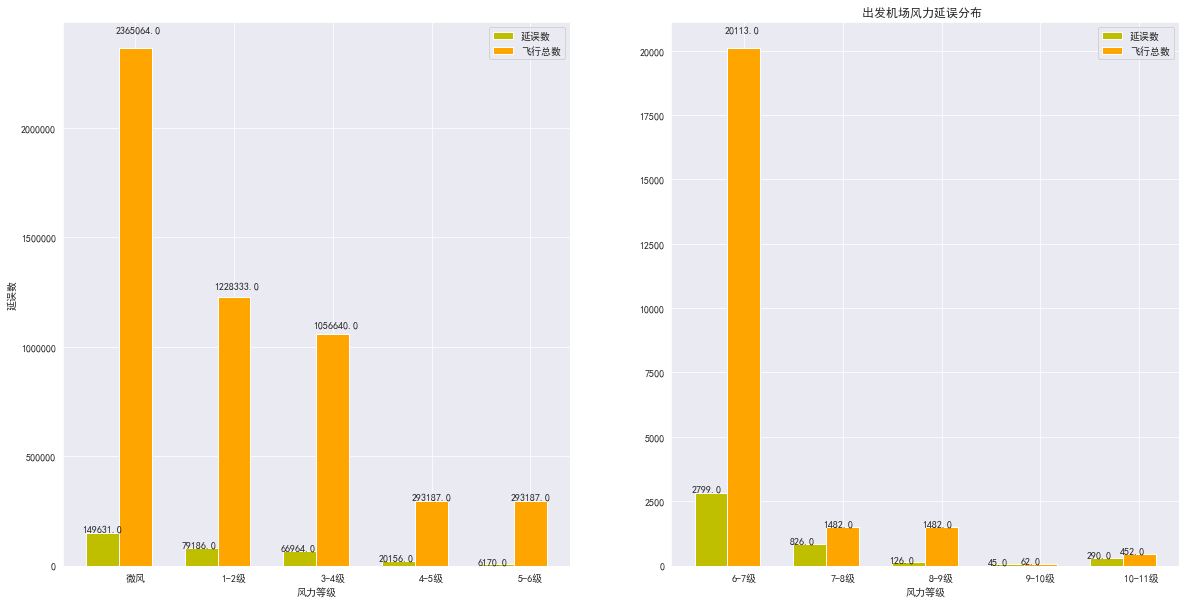

In [50]:
#作图：风力和是否延误柱状图
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))
        
l1 = [149631, 79186, 66964, 20156, 6170]
l2 = [2365064, 1228333, 1056640, 293187, 293187]
name1 = ['微风', '1-2级', '3-4级','4-5级','5-6级',]

# name = 出发机场风力延误分布['出发机场风力'].values.tolist()
total_width, n = 1, 3  
width = total_width / n 
x=[0,1,2,3,4]    
a=plt.bar(x, l1, width=width, label='延误数',fc = 'y')  
for i in range(len(x)):  
    x[i] = x[i] + width  
b=plt.bar(x, l2, width=width, label='飞行总数',tick_label = name1,fc = 'orange')   
autolabel(a)
autolabel(b)    
ax1.set_xlabel('风力等级')
ax1.set_ylabel('延误数')
plt.legend(['延误数', '飞行总数']) 




ax2 = plt.subplot(1,2,2)
l3 = [2799, 826,126,45,290]
l4 = [20113,1482,1482,62,452]
name2 = ['6-7级', '7-8级','8-9级', '9-10级',' 10-11级']
x2=[0,1,2,3,4]
c=plt.bar(x2, l3, width=width, label='延误数',fc = 'y')  
for i in range(len(x2)):  
    x2[i] = x2[i] + width  
d=plt.bar(x2, l4, width=width, label='飞行总数',tick_label = name2,fc = 'orange')
    
autolabel(c)
autolabel(d)
    
ax2.set_xlabel('风力等级')
# ax2.set_ylabel('延误数')
plt.legend(['延误数', '飞行总数']) 
plt.title('出发机场风力延误分布 ')
plt.show()

In [45]:
#探索aqi质量与延误关系
All_Data['出发机场aqiInfo'].unique()

array(['轻度污染', '良', '中度污染', '重度污染', '优', '严重污染', nan], dtype=object)

In [46]:
出发机场aqi延误分布 = All_Data.groupby('出发机场aqiInfo', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
出发机场aqi延误分布 ['出发机场aqi延误比'] = 出发机场aqi延误分布 ['延误'] / 出发机场aqi延误分布 ['总数'] 
出发机场aqi延误分布 ['占总延误比'] = 出发机场aqi延误分布 ['延误'] / sum(All_Data.是否延误3小时以上) 
出发机场aqi延误分布 

,出发机场aqiInfo,延误,总数,出发机场aqi延误比,占总延误比
0,严重污染,6932,50964,0.136018,0.020130
1,中度污染,14819,205670,0.072052,0.043034
2,优,111428,1596547,0.069793,0.323581
3,良,142046,2437334,0.058279,0.412494
4,轻度污染,36938,612470,0.060310,0.107266
5,重度污染,13571,137502,0.098697,0.039409


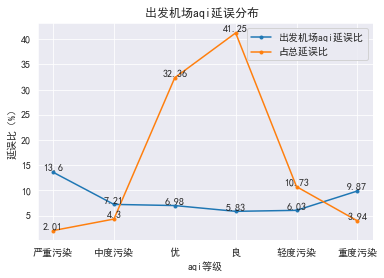

In [55]:
x = 出发机场aqi延误分布.出发机场aqiInfo.values.tolist()
y1 = 出发机场aqi延误分布.出发机场aqi延误比.values.tolist()
y2 = 出发机场aqi延误分布.占总延误比.values.tolist()
y1 = [item * 100 for item in y1]
y2 = [item * 100 for item in y2]
#保留小数点后2位
y1 = [float('{:.2f}'.format(i)) for i in y1]
y2 = [float('{:.2f}'.format(i)) for i in y2]
plt.title('出发机场aqi延误分布 ')  # 折线图标题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('aqi等级')  # x轴标题
plt.ylabel('延误比（%）')  # y轴标题
plt.plot(x, y1, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
plt.plot(x, y2, marker='o', markersize=3)
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  # 设置数据标签位置及大小
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
plt.legend(['出发机场aqi延误比', '占总延误比'])  # 设置折线名称
plt.show()

In [47]:
到达机场aqi延误分布 = All_Data.groupby('到达机场aqiInfo', as_index = False)['是否延误3小时以上'].agg({'延误':'sum', '总数':'count'})
到达机场aqi延误分布 ['到达机场aqi延误比'] = 到达机场aqi延误分布 ['延误'] / 到达机场aqi延误分布 ['总数'] 
到达机场aqi延误分布 ['占总延误比'] = 到达机场aqi延误分布 ['延误'] / sum(All_Data.是否延误3小时以上) 
到达机场aqi延误分布 

,到达机场aqiInfo,延误,总数,到达机场aqi延误比,占总延误比
0,严重污染,7179,51200,0.140215,0.020847
1,中度污染,14992,205973,0.072786,0.043536
2,优,111312,1599959,0.069572,0.323244
3,良,143749,2440696,0.058897,0.417439
4,轻度污染,36779,612604,0.060037,0.106804
5,重度污染,13900,137833,0.100847,0.040365


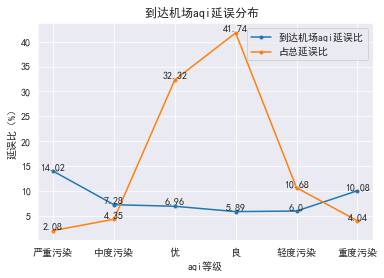

In [56]:
x = 到达机场aqi延误分布.到达机场aqiInfo.values.tolist()
y1 = 到达机场aqi延误分布.到达机场aqi延误比.values.tolist()
y2 = 到达机场aqi延误分布.占总延误比.values.tolist()
y1 = [item * 100 for item in y1]
y2 = [item * 100 for item in y2]
#保留小数点后2位
y1 = [float('{:.2f}'.format(i)) for i in y1]
y2 = [float('{:.2f}'.format(i)) for i in y2]
plt.title('到达机场aqi延误分布 ')  # 折线图标题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('aqi等级')  # x轴标题
plt.ylabel('延误比（%）')  # y轴标题
plt.plot(x, y1, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
plt.plot(x, y2, marker='o', markersize=3)
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  # 设置数据标签位置及大小
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
plt.legend(['到达机场aqi延误比', '占总延误比'])  # 设置折线名称
plt.show()